In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical


a. Loading and preprocessing the image data

In [2]:
mnist_train=pd.read_csv('./mnist_train.csv')
x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [3]:
mnist_test=pd.read_csv('./mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [4]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

b. Defining the model's architecture

In [7]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

c:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9063 - loss: 0.3096 - val_accuracy: 0.9857 - val_loss: 0.0466
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9846 - loss: 0.0486 - val_accuracy: 0.9897 - val_loss: 0.0324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9903 - loss: 0.0321 - val_accuracy: 0.9865 - val_loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9934 - loss: 0.0225 - val_accuracy: 0.9899 - val_loss: 0.0300
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9966 - loss: 0.0119 - val_accuracy: 0.9923 - val_loss: 0.0237
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9971 - loss: 

d. Estimating the model's performance

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0466
Test accuracy: 0.9897000193595886


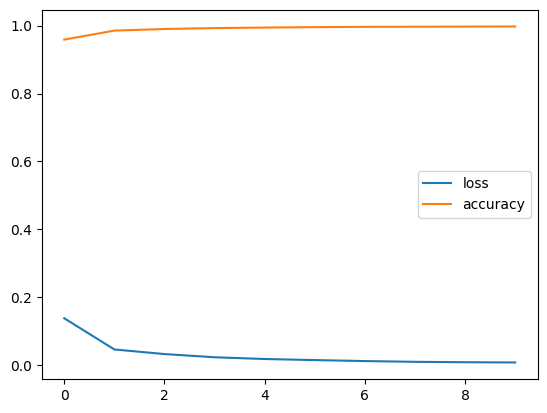

In [12]:
plt.plot(history.history['loss'],label=('loss'))
plt.plot(history.history['accuracy'],label=('accuracy'))
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Actual Number:  0
Predicted Number:  0


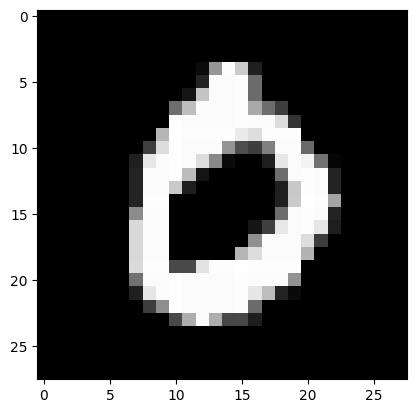

In [13]:
n = 3
plt.imshow(x_test[n].reshape(28, 28), "gray")

predicted_value = model.predict(x_test)

print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))